In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
target = "charges"

In [5]:
y = df[target]

In [6]:
X = df.drop(columns=[target])

In [10]:
X.head()
X = pd.get_dummies(X, drop_first=True)
X

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


In [57]:
from sklearn import preprocessing

In [11]:
from sklearn import model_selection

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

In [13]:
import numpy as np

In [56]:
np.random.seed(1)
np.random.random(5)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [58]:
scaler = preprocessing.StandardScaler()

In [59]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [62]:
from sklearn import linear_model

In [63]:
est = linear_model.LinearRegression()

In [64]:
est.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

In [67]:
error = y_test_pred - y_test

In [69]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'error')

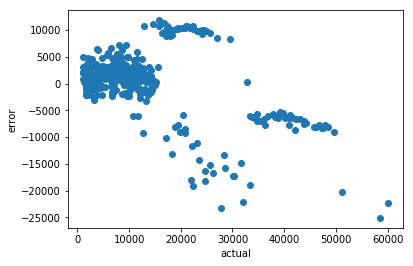

In [71]:
plt.scatter(y_test, error)
plt.xlabel("actual")
plt.ylabel("error")

In [73]:
sse = (error ** 2).sum()
sse

14778105453.509335

In [75]:
baseline = y_train.mean()
baseline

13276.698553898494

In [76]:
sst = ((baseline - y_test) ** 2).sum()

In [77]:
sse/sst

0.2594002695488974

In [79]:
r2 = 1 - sse/sst
r2

0.7405997304511026

Text(0, 0.5, 'error against baseline')

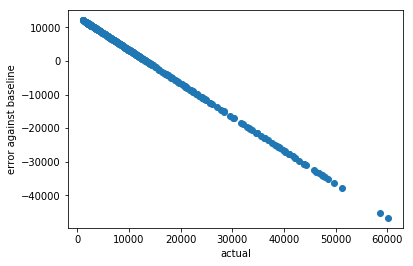

In [78]:
plt.scatter(y_test, baseline - y_test)
plt.xlabel("actual")
plt.ylabel("error against baseline")

In [80]:
from sklearn import metrics

In [83]:
print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

test r2:  0.7405989316927211
train r2:  0.7545557492633161
test rmse:  6063.122656850451
train rmse:  6039.6018713245385


In [85]:
est.intercept_

13276.698553898505

In [86]:
est.coef_

array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
       9733.78688309, -129.54588605, -414.54148288, -379.09534369])

In [87]:
X.columns

Index(['age', 'bmi', 'children', 'gender_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [88]:
pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})

,feature,coefficient
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


Text(0, 0.5, 'error')

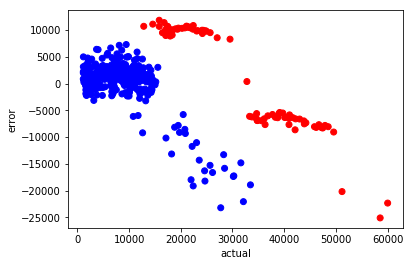

In [91]:
colors = np.where(X_test.smoker_yes > 0.5, "red", "blue")
plt.scatter(y_test, error, color = colors)
plt.xlabel("actual")
plt.ylabel("error")

test r2:  0.7900566633733725
train r2:  0.7608907031255225
test rmse:  0.1825077859545461
train rmse:  0.1953820544424062


,feature,coefficient
0,age,0.212129
1,bmi,0.019741
2,children,0.048429
3,gender_male,-0.020193
4,smoker_yes,0.274146
5,region_northwest,-0.010342
6,region_southeast,-0.029924
7,region_southwest,-0.025481
8,age_group_s2,0.015546
9,bmi_group_r2,-0.019526


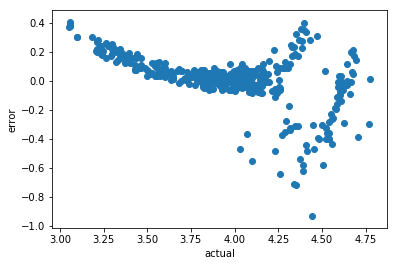

In [98]:
df = pd.read_csv("/data/insurance.csv")
target = "charges"
y = np.log10(df[target])
X = df.drop(columns=[target])
X["age_group"] = np.where(X.age>60, "s1", "s2")
X["bmi_group"] = np.where(X.bmi>30, "r1", "r2")
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

est = linear_model.LinearRegression()

est.fit(X_train_std, y_train)

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

test_error = y_test_pred - y_test
plt.scatter(y_test, test_error)
plt.xlabel("actual")
plt.ylabel("error")

pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})


In [94]:
np.log10([2, 5, 7, 50])

array([0.30103   , 0.69897   , 0.84509804, 1.69897   ])

In [100]:
a = np.array([
    [1, 2, 3],
    [-3, 4, 0],
    [4, 5, 0],
    [1, 3, 2]
])
a

array([[ 1,  2,  3],
       [-3,  4,  0],
       [ 4,  5,  0],
       [ 1,  3,  2]])

In [101]:
from sklearn import preprocessing

In [104]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

In [105]:
poly.fit_transform(a)

array([[  1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.],
       [ -3.,   4.,   0.,   9., -12.,  -0.,  16.,   0.,   0.],
       [  4.,   5.,   0.,  16.,  20.,   0.,  25.,   0.,   0.],
       [  1.,   3.,   2.,   1.,   3.,   2.,   9.,   6.,   4.]])

test r2:  0.873230367248648
train r2:  0.8367821916581274
test rmse:  0.14182015807694448
train rmse:  0.16142478315464212


array([-5.01430259e-02, -4.54072176e-02,  2.17665713e-01,  1.60104018e+12,
        1.56715246e+11,  3.58745957e+12,  1.36893032e+12, -2.25841474e+12,
        6.51336202e+11,  2.83956397e+12, -6.92138672e-02,  1.67236328e-02,
       -9.37652588e-02,  5.18188477e-02, -2.43530273e-01,  1.59912109e-02,
        6.61697388e-02,  7.15942383e-02,  3.59741211e-01,  1.66625977e-02,
        3.19824219e-02, -9.24682617e-03,  3.09753418e-02,  8.52050781e-02,
       -7.17773438e-02, -1.63513184e-01, -4.76684570e-02,  4.83398438e-02,
        5.39550781e-02, -3.47290039e-02,  4.88281250e-03, -3.71398926e-02,
        1.23291016e-02,  4.85229492e-03,  1.95312500e-03, -5.03540039e-02,
        1.16577148e-02, -1.60104018e+12,  1.27868652e-02,  4.15039062e-03,
       -3.41796875e-03, -3.96728516e-03,  1.10321045e-02,  6.13403320e-03,
       -1.56715246e+11,  1.09863281e-02,  1.66625977e-02,  2.11181641e-02,
       -9.85717773e-03, -6.79931641e-02, -3.58745957e+12, -8.45793869e+08,
        1.89687879e+08, -

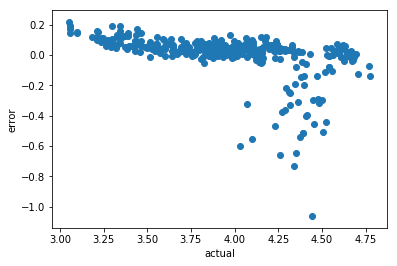

In [109]:
df = pd.read_csv("/data/insurance.csv")
target = "charges"
y = np.log10(df[target])
X = df.drop(columns=[target])
X["age_group"] = np.where(X.age>60, "s1", "s2")
X["bmi_group"] = np.where(X.bmi>30, "r1", "r2")
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

X_train = poly.fit_transform(X_train) 
X_test = poly.transform(X_test)

scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

est = linear_model.LinearRegression()

est.fit(X_train_std, y_train)

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

test_error = y_test_pred - y_test
plt.scatter(y_test, test_error)
plt.xlabel("actual")
plt.ylabel("error")

#pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})
est.coef_


In [110]:
from sklearn import pipeline

In [115]:
df = pd.read_csv("/data/insurance.csv")
target = "charges"
y = np.log10(df[target])
X = df.drop(columns=[target])
X["age_group"] = np.where(X.age>60, "s1", "s2")
X["bmi_group"] = np.where(X.bmi>30, "r1", "r2")
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  0.873230367248648
train r2:  0.8367821916581274
test rmse:  0.14182015807694448
train rmse:  0.16142478315464212
